In [298]:
using CSV, DataFrames, Dates

In [299]:
romania_full = CSV.read("../data/romania.csv", DataFrame);
romania = romania_full[romania_full.Datetime .> DateTime(1976,1,1,0,0,0),:]

Row,Datetime,Latitude,Longitude,Depth,Magnitude
,DateTime,Float64,Float64,Float64,Float64
1,1976-02-03T13:29:16.400,45.32,25.99,184.3,2.6
2,1976-08-19T19:03:00.800,45.54,26.37,162.0,2.3
3,1976-09-07T17:38:08.200,45.62,26.5,155.3,3.6
4,1976-10-01T17:50:43.200,45.68,26.49,146.0,6.0
5,1976-10-15T10:54:48,47.1,25.6,17.0,3.9
6,1977-03-04T19:21:54.100,45.77,26.76,94.0,7.4
7,1977-03-04T21:21:01.100,45.22,26.65,141.0,3.0
8,1977-03-04T21:28:07.400,45.23,26.87,22.0,1.5
9,1977-03-04T23:17:14,45.0,27.2,33.0,2.5


In [302]:
mapcoords= Dict("minLat"=>minimum(romania.Latitude),
            "maxLat"=>maximum(romania.Latitude),
            "minLon"=>minimum(romania.Longitude),
            "maxLon"=>maximum(romania.Longitude),
            "minDepth"=>minimum(romania.Depth),
            "maxDepth"=>maximum(romania.Depth),
            "minMag"=>minimum(romania.Magnitude),
            "maxMag"=>maximum(romania.Magnitude)
)

Dict{String, Float64} with 8 entries:
  "maxLon"   => 29.84
  "minMag"   => 0.1
  "minLon"   => 20.19
  "maxMag"   => 7.4
  "minLat"   => 43.5941
  "maxLat"   => 48.23
  "maxDepth" => 218.4
  "minDepth" => 0.0

In [304]:
using Images, FileIO

┌ Warning: Png warn: iCCP: known incorrect sRGB profile
└ @ PNGFiles C:\Users\gabipana\.julia\packages\PNGFiles\YCPWZ\src\wraphelpers.jl:2


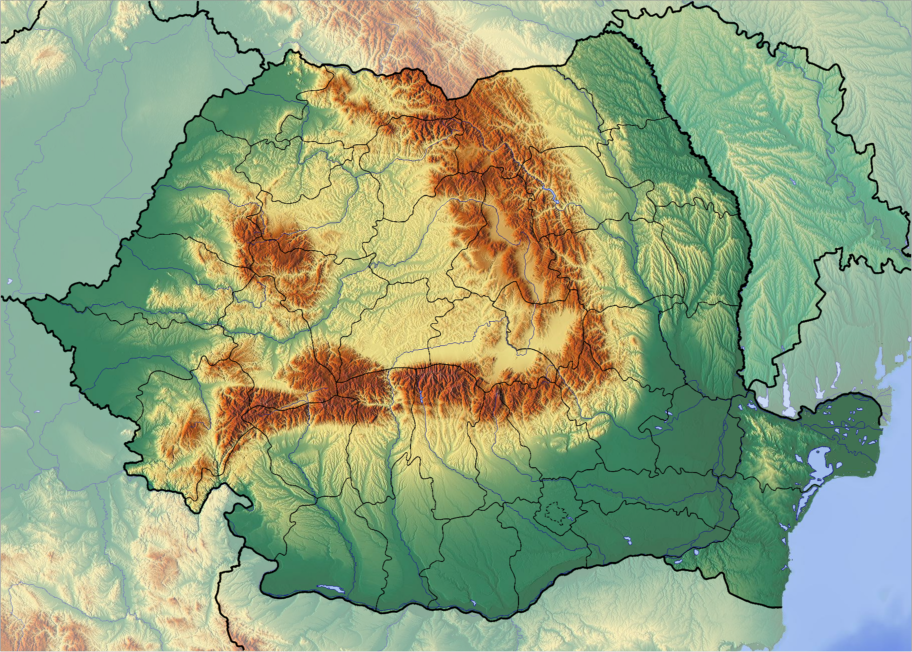

In [305]:
# specify the path to your local image file
img_path = "../maps/romania_wikipedia.png"
img = load(img_path)

In [307]:
using GLMakie

In [458]:
using LaTeXStrings

In [459]:
GLMakie.activate!()
# Makie.inline!(true)

In [526]:
fig = Figure( resolution=(1080, 720))


In [527]:
empty!(fig)

In [528]:
ax = Axis3(fig[1,1];    
    title = "A Makie Axis",
    xlabel = "Latitude",
    ylabel = "Longitude",
    zlabel = "Depth",
    perspectiveness=0.5
)

Axis3()

In [529]:
# markerSizes = [10+log10(10*x) for x in romania.Magnitude];
markerSizes2 = [1.7^x for x in romania.Magnitude];

In [530]:
sc = scatter!(ax,
romania.Latitude,
romania.Longitude, 
-romania.Depth;
markersize= markerSizes2,
color= romania.Magnitude,
colormap= (Reverse(:devon), 0.99),
strokewidth= 0.5,
shading= false
# transparency= true
# alpha = 0.8
)



Scatter{Tuple{Vector{Point{3, Float32}}}}

In [531]:
Colorbar(fig[1, 2], sc, label="Magnitudes", height=Relative(0.5))

Colorbar()

In [533]:
image!(ax , 
    mapcoords["minLat"] .. mapcoords["maxLat"],
    mapcoords["minLon"] .. mapcoords["maxLon"],
    # rot180(img*0.6); 
    img*0.6;
    transformation=(:xy,- mapcoords["maxDepth"]),
    # transformation=(:xy, 10),
)

Image{Tuple{Vector{Float32}, Vector{Float32}, Matrix{RGBA{Float32}}}}

In [538]:
println(mapcoords["minLat"]," ",mapcoords["maxLat"]," ",mapcoords["minLon"]," ",mapcoords["maxLon"],)

43.5941 48.23 20.19 29.84


In [428]:
typeof(img)

Matrix{RGBA{N0f8}} (alias for Array{RGBA{Normed{UInt8, 8}}, 2})

In [398]:
image!(ax , 
    mapcoords["minLon"] .. mapcoords["maxLon"],
    mapcoords["minLat"] .. mapcoords["maxLat"], 
    rotr90(img); 
    opacity=0.5,
    transparency=true,
    color=(0.5))

Image{Tuple{Vector{Float32}, Vector{Float32}, Matrix{RGBA{Float32}}}}

In [ ]:
# meanMag = mean(romania.Magnitude)
# magnitudesScale = [((x-meanMag)/(mapcoords["maxMag"]-mapcoords["minMag"]))*10 for x in romania.Magnitude];

In [267]:
sc = scatter!(ax,
    romania.Longitude, 
    romania.Latitude, 
    -romania.Depth;
    markersize=s,
    color=romania.Magnitude,
    # colormap=:viridis,
    strokewidth=1,
    transparency=true
    # alpha = 0.01
    )

Scatter{Tuple{Vector{Point{3, Float32}}}}

Colorbar()

Image{Tuple{Vector{Float32}, Vector{Float32}, Matrix{RGBA{Float32}}}}

In [ ]:
# sz = size(img)

# xx = LinRange(mapcoords["minLat"],mapcoords["maxLat"],sz[1])
# yy = LinRange(mapcoords["minLon"],mapcoords["maxLon"],sz[2])

# x = ones(size(img,1),1)
# y = ones(size(img,2),1)
# z = -mapcoords["maxDepth"] * ones((size(img,1)),(size(img,2)))

# for i = 1:length(x)
#     x[i] = xx[i]
# end

# for i = 1:length(y)
#     y[i] = yy[i]
# end

In [ ]:
#surface!(ga, lonmin..lonmax, latmin..latmax, ones(size(img)...); color = img, shading = false).